96の単語ベクトルに対して，ベクトル空間をt-SNEで可視化せよ．

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [2]:
country_vec = pd.read_pickle('./096.country_vector.zip')
print(country_vec.info())

<class 'pandas.core.frame.DataFrame'>
Index: 238 entries, American_Samoa to Zimbabwe
Columns: 300 entries, 0 to 299
dtypes: float64(300)
memory usage: 559.7+ KB
None


In [3]:
# t-SNE
t_sne = TSNE(perplexity=30, learning_rate=500).fit_transform(country_vec)
print('t_sne shape:', t_sne.shape)

t_sne shape: (238, 2)


In [4]:
# KMeansクラスタリング
clustered = KMeans(n_clusters=5).fit_predict(country_vec)

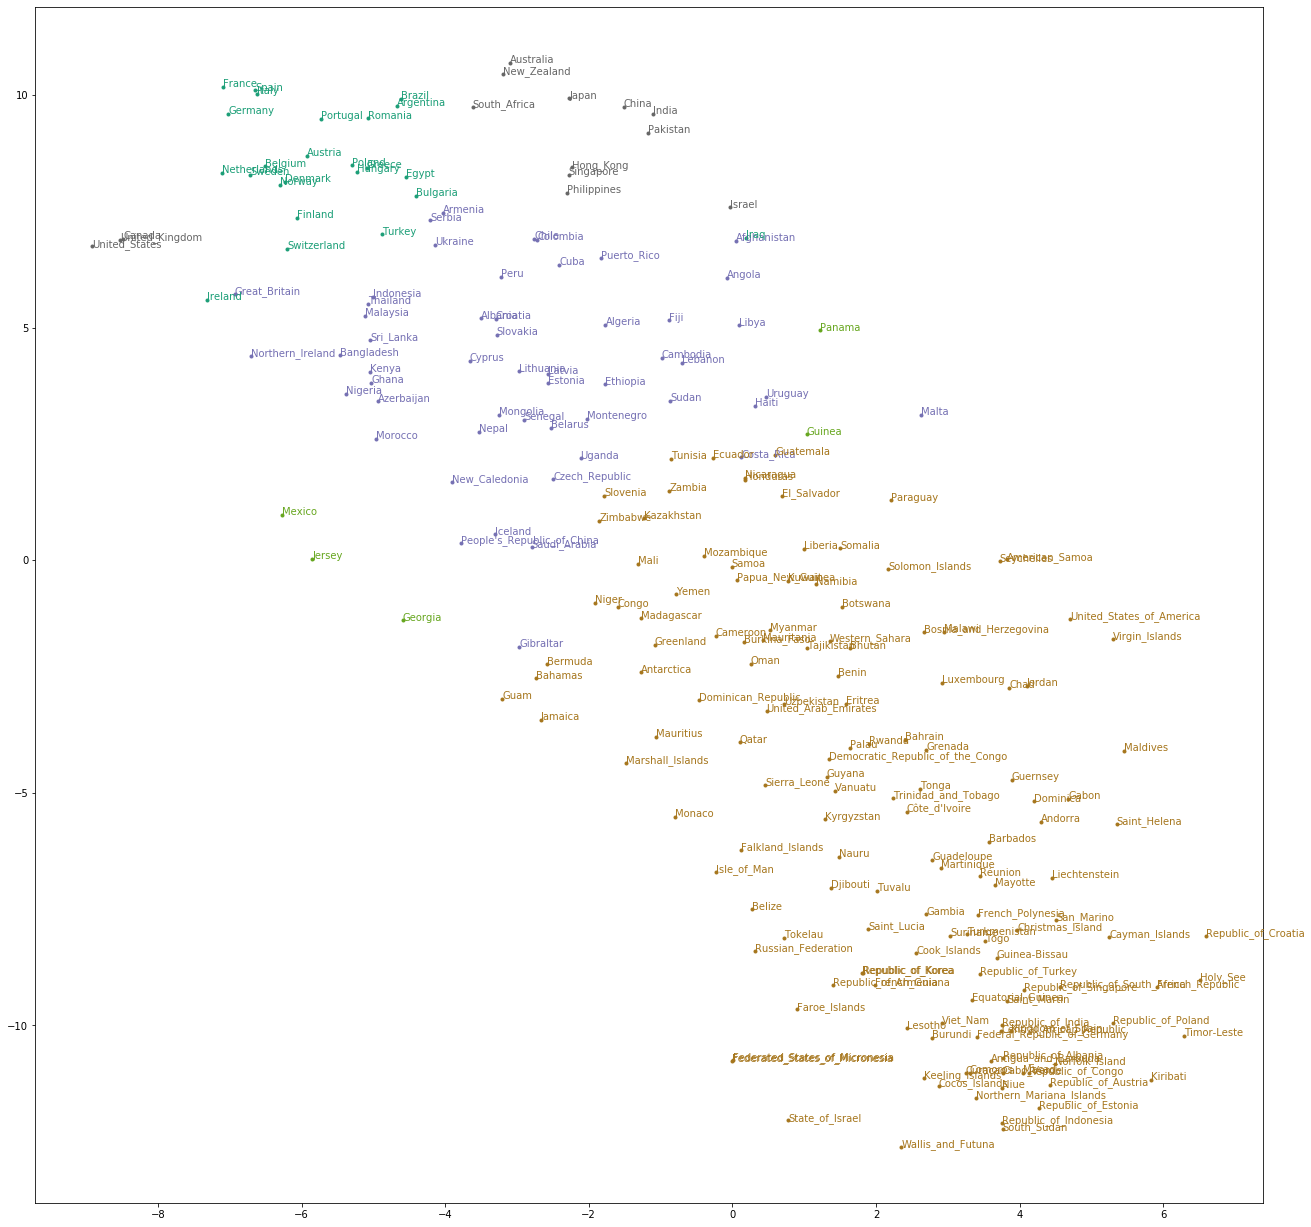

In [5]:
# 表示
fig, ax = plt.subplots(figsize=(22, 22))

# Set Color map. https://matplotlib.org/examples/color/colormaps_reference.html
cmap = plt.get_cmap('Dark2')
for i in range(t_sne.shape[0]):
    cval = cmap(clustered[i] / 4)
    ax.scatter(t_sne[i][0], t_sne[i][1], marker='.', color=cval)
    ax.annotate(country_vec.index[i], xy=(t_sne[i][0], t_sne[i][1]), color=cval)
plt.show()